In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

<p> Data science lib imports

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 8
plt.style.use("seaborn")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

<h> Load Data

In [3]:
train_df = pd.read_csv(Path('2019loans.csv'))
test_df = pd.read_csv(Path('2020Q1loans.csv'))

<h> Initial Look at data

In [4]:
train_df.head()

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,target
0,7000.0,0.1894,256.38,MORTGAGE,75000.0,Not Verified,n,28.62,0.0,2.0,...,87.5,0.0,0.0,352260.0,62666.0,35000.0,10000.0,N,N,low_risk
1,40000.0,0.1614,975.71,MORTGAGE,102000.0,Source Verified,n,11.72,2.0,0.0,...,0.0,0.0,0.0,294664.0,109911.0,9000.0,71044.0,N,N,low_risk
2,11000.0,0.2055,294.81,RENT,45000.0,Verified,n,37.25,1.0,3.0,...,7.7,0.0,0.0,92228.0,36007.0,33000.0,46328.0,N,N,low_risk
3,4000.0,0.1612,140.87,MORTGAGE,38000.0,Not Verified,n,42.89,1.0,0.0,...,100.0,0.0,0.0,284273.0,52236.0,13500.0,52017.0,N,N,low_risk
4,14000.0,0.1797,505.93,MORTGAGE,43000.0,Source Verified,n,22.16,1.0,0.0,...,25.0,0.0,0.0,120280.0,88147.0,33300.0,78680.0,N,N,low_risk


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12180 entries, 0 to 12179
Data columns (total 84 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   12180 non-null  float64
 1   int_rate                    12180 non-null  float64
 2   installment                 12180 non-null  float64
 3   home_ownership              12180 non-null  object 
 4   annual_inc                  12180 non-null  float64
 5   verification_status         12180 non-null  object 
 6   pymnt_plan                  12180 non-null  object 
 7   dti                         12180 non-null  float64
 8   delinq_2yrs                 12180 non-null  float64
 9   inq_last_6mths              12180 non-null  float64
 10  open_acc                    12180 non-null  float64
 11  pub_rec                     12180 non-null  float64
 12  revol_bal                   12180 non-null  float64
 13  total_acc                   121

In [6]:
test_df.head()

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,target
0,40000.0,0.1033,856.40,RENT,128700.0,Source Verified,n,12.47,0.0,1.0,...,57.1,0.0,0.0,63915.0,49510.0,49400.0,14515.0,Y,N,low_risk
1,24450.0,0.1430,572.72,MORTGAGE,44574.0,Not Verified,n,15.05,0.0,1.0,...,0.0,0.0,0.0,136425.0,19439.0,15500.0,18925.0,N,N,low_risk
2,13500.0,0.1430,316.23,OWN,60000.0,Not Verified,n,28.72,0.0,0.0,...,0.0,0.0,0.0,82124.0,65000.0,5400.0,61724.0,Y,N,low_risk
3,10625.0,0.1774,268.31,RENT,60000.0,Verified,n,15.70,0.0,4.0,...,20.0,0.0,0.0,54855.0,50335.0,23200.0,26255.0,N,N,low_risk
4,6375.0,0.1862,232.46,RENT,60000.0,Source Verified,n,35.50,0.0,0.0,...,75.0,0.0,0.0,90445.0,56541.0,15300.0,72345.0,N,N,low_risk


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4702 entries, 0 to 4701
Data columns (total 84 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   4702 non-null   float64
 1   int_rate                    4702 non-null   float64
 2   installment                 4702 non-null   float64
 3   home_ownership              4702 non-null   object 
 4   annual_inc                  4702 non-null   float64
 5   verification_status         4702 non-null   object 
 6   pymnt_plan                  4702 non-null   object 
 7   dti                         4702 non-null   float64
 8   delinq_2yrs                 4702 non-null   float64
 9   inq_last_6mths              4702 non-null   float64
 10  open_acc                    4702 non-null   float64
 11  pub_rec                     4702 non-null   float64
 12  revol_bal                   4702 non-null   float64
 13  total_acc                   4702 

Initial Data Conversions & preprocessing

In [8]:
# Convert categorical data to numeric and separate target feature for training data
X_train = pd.get_dummies(train_df.drop(columns=['target']))
y_train = train_df['target']

X_train.head(2)
y_train.head(2)

0    low_risk
1    low_risk
Name: target, dtype: object

In [22]:
# Convert categorical data to numeric and separate target feature for testing data
X_test = pd.get_dummies(test_df.drop(columns=['target']))
y_test = test_df['target']

X_test.head(2)
y_test.head(2)

0    low_risk
1    low_risk
Name: target, dtype: object

In [23]:
# add missing dummy variables to testing set
for col in X_train.columns: 
    if col not in X_test.columns:
        X_test[col] = 0
        

Initial Model Training

In [28]:
# Train the Logistic Regression model on the unscaled data and print the model score
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
round(classifier.score(X_test, y_test), 2)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.51

In [27]:
# Train a Random Forest Classifier model and print the model score
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
round(rfc.score(X_test, y_test), 2)

0.64

In [39]:
# Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [37]:
# Train the Logistic Regression model on the scaled data and print the model score
classifier = LogisticRegression()
classifier.fit(X_train_scaled, y_train)
round(classifier.score(X_test_scaled, y_test), 2)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.76

In [98]:
# Train a Random Forest Classifier model on the scaled data and print the model score
rfc = RandomForestClassifier()
rfc.fit(X_train_scaled, y_train)
round(rfc.score(X_test_scaled, y_test), 2)

0.64

Bonus Werk :D 

Finding Feature Importances

<AxesSubplot:>

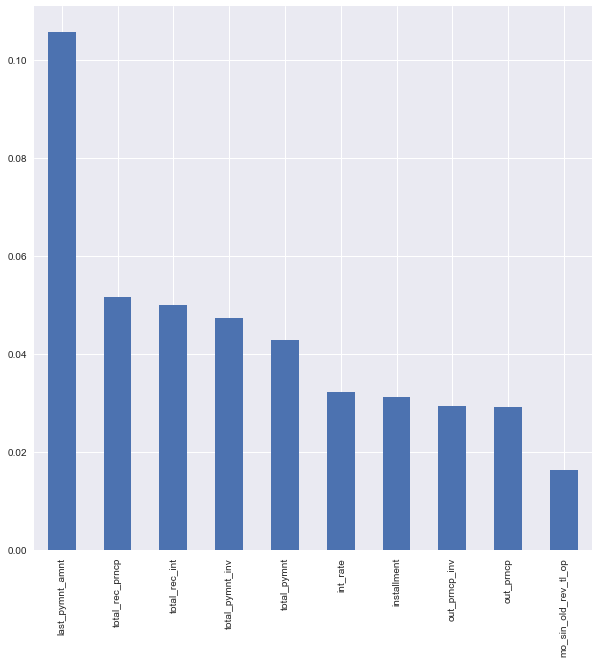

In [99]:
features = rfc.feature_importances_
# print(features)

feat_plot=pd.Series(rfc.feature_importances_, index=X_train.columns).nlargest(10).sort_values(ascending=False)[:200].plot(kind='bar', figsize=(10,10))
feat_plot

In [94]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)
importances

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Attribute,Importance
20,last_pymnt_amnt,1.022883
7,open_acc,0.702392
15,total_rec_prncp,0.616636
0,loan_amnt,0.401077
75,total_il_high_credit_limit,0.266071
...,...,...
72,tot_hi_cred_lim,-0.375430
60,num_op_rev_tl,-0.437137
16,total_rec_int,-0.815929
17,total_rec_late_fee,-0.921343


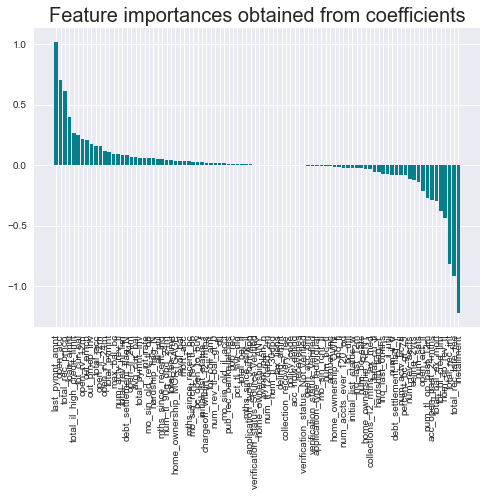

In [108]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical', fontsize=10)
plt.show()

In [184]:
from sklearn.feature_selection import SelectFromModel

sel = SelectFromModel(model)
sel_model=sel.fit(X_train_scaled, y_train)
sel.get_support()
sel_true =sel.get_support('True')
sel_true.tolist()

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0,
 2,
 7,
 10,
 11,
 12,
 15,
 16,
 17,
 20,
 25,
 27,
 28,
 33,
 41,
 60,
 63,
 67,
 72,
 73,
 75]

In [186]:
feat_import=X_train.columns(sel_true)
        
    

TypeError: 'Index' object is not callable

In [123]:
train_df.columns

Index(['loan_amnt', 'int_rate', 'installment', 'home_ownership', 'annual_inc',
       'verification_status', 'pymnt_plan', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'm

In [119]:
train_df['target'].value_counts()

high_risk    6090
low_risk     6090
Name: target, dtype: int64

In [124]:
train_hr = train_df.loc[train_df['target']=='high_risk']
train_hr['target'].value_counts()
train_hr.head(2)

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,target
6090,4400.0,0.200,163.52,RENT,41000.0,Not Verified,n,31.82,0.0,0.0,...,0.0,0.0,0.0,38014.0,27390.0,5400.0,25314.0,N,N,high_risk
6091,5000.0,0.288,208.99,MORTGAGE,80000.0,Source Verified,n,16.88,0.0,2.0,...,80.0,0.0,0.0,551300.0,113366.0,10700.0,8600.0,N,N,high_risk


In [132]:
train_hr_cut = train_hr[['loan_amnt', 'int_rate', 'home_ownership', 'annual_inc', 'tot_hi_cred_lim', 'hardship_flag', 'pub_rec_bankruptcies', 'last_pymnt_amnt']]

# train_hr_cut = train_hr('loan_amnt', 'int_rate', 'home_ownership', 'annual_inc')
train_hr_cut


,loan_amnt,int_rate,home_ownership,annual_inc,tot_hi_cred_lim,hardship_flag,pub_rec_bankruptcies,last_pymnt_amnt
6090,4400.0,0.2000,RENT,41000.0,38014.0,N,0.0,0.00
6091,5000.0,0.2880,MORTGAGE,80000.0,551300.0,N,0.0,0.00
6092,5400.0,0.0819,RENT,58000.0,374414.0,N,0.0,0.00
6093,11000.0,0.1474,MORTGAGE,80000.0,248484.0,N,0.0,0.00
6094,1000.0,0.1797,RENT,21456.0,47375.0,N,0.0,0.00
...,...,...,...,...,...,...,...,...
12175,19975.0,0.2565,RENT,28000.0,50055.0,N,0.0,0.00
12176,15000.0,0.1774,RENT,50000.0,70324.0,N,0.0,270.17
12177,3600.0,0.1862,RENT,60000.0,83765.0,N,0.0,0.00
12178,15000.0,0.0881,MORTGAGE,62000.0,189930.0,N,0.0,0.00


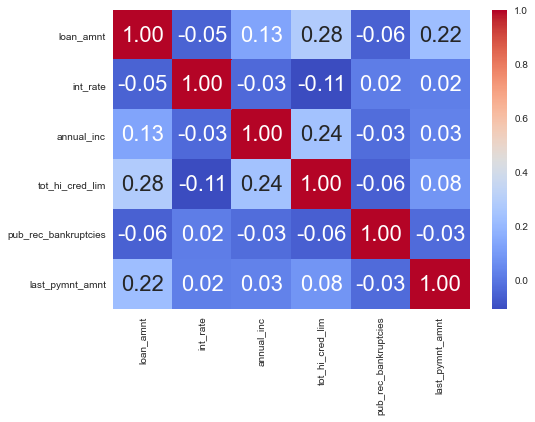

In [133]:
#Visualize the correlation using seaborn heatmap
import seaborn as sns

sns.heatmap(train_hr_cut.corr(),annot=True,fmt="0.2f",cmap="coolwarm")
plt.show()

Assessing Confusion Matrics 

In [42]:
from sklearn.metrics import confusion_matrix
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_true = y_test
y_pred = classifier.predict(X_test)
confusion_matrix(y_true, y_pred)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[ 711, 1640],
       [ 669, 1682]])

In [43]:
classifier = LogisticRegression()
classifier.fit(X_train_scaled, y_train)
y_true = y_test
y_pred = classifier.predict(X_test_scaled)
confusion_matrix(y_true, y_pred)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[1764,  587],
       [ 542, 1809]])

In [109]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

   high_risk       0.76      0.75      0.76      2351
    low_risk       0.76      0.77      0.76      2351

    accuracy                           0.76      4702
   macro avg       0.76      0.76      0.76      4702
weighted avg       0.76      0.76      0.76      4702



K Nearest Neighbors Modeling

In [46]:
from sklearn.neighbors import KNeighborsClassifier

k: 1, Train/Test Score: 1.000/0.525
k: 3, Train/Test Score: 0.787/0.543
k: 5, Train/Test Score: 0.737/0.553
k: 7, Train/Test Score: 0.711/0.561
k: 9, Train/Test Score: 0.705/0.571
k: 11, Train/Test Score: 0.696/0.569
k: 13, Train/Test Score: 0.689/0.576
k: 15, Train/Test Score: 0.679/0.575
k: 17, Train/Test Score: 0.678/0.570
k: 19, Train/Test Score: 0.671/0.578


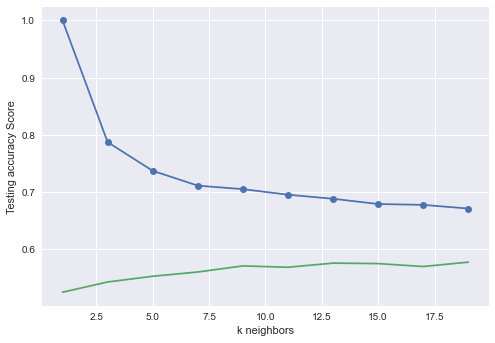

In [47]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

Boosting Test

In [97]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(random_state=1, n_estimators=50, base_estimator=DecisionTreeClassifier(max_depth=2)).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.8114121510673235
Testing Score: 0.5942152275627393


In [50]:
ARF = AdaBoostClassifier(random_state=1, n_estimators=50, base_estimator=RandomForestClassifier(max_depth=2)).fit(X_train_scaled, y_train)
print(f'Training Score: {ARF.score(X_train_scaled, y_train)}')
print(f'Testing Score: {ARF.score(X_test_scaled, y_test)}')

Training Score: 0.8029556650246306
Testing Score: 0.63143343258188
